In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('C:/Users/Administrator/Desktop/pandas_practise/consumption_data.xls',index_col = 'Id');
df.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [5]:
df.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std = StandardScaler()

In [8]:
std.fit(df)

F:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
data = std.transform(df)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 3, n_jobs = 4, max_iter = 500)

In [12]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
df['labels'] = model.labels_

In [14]:
df

,R,F,M,labels
Id,,,,
1,27,6,232.61,2
2,3,5,1507.11,2
3,4,16,817.62,1
4,3,11,232.81,2
5,14,7,1913.05,2
6,19,6,220.07,2
7,5,2,615.83,2
8,26,2,1059.66,2
9,21,9,304.82,2


In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE()

In [18]:
tsne.fit_transform(data)

array([[  9.980312 ,  22.406172 ],
       [-30.800158 ,  -2.452636 ],
       [ 33.41375  ,  -4.1822834],
       ...,
       [ -4.1873446,  -1.2679647],
       [ -6.270032 ,   5.7945848],
       [ -9.596523 ,  16.869862 ]], dtype=float32)

In [19]:
import matplotlib.pylab as plt

In [20]:
tsne.embedding_

array([[  9.980312 ,  22.406172 ],
       [-30.800158 ,  -2.452636 ],
       [ 33.41375  ,  -4.1822834],
       ...,
       [ -4.1873446,  -1.2679647],
       [ -6.270032 ,   5.7945848],
       [ -9.596523 ,  16.869862 ]], dtype=float32)

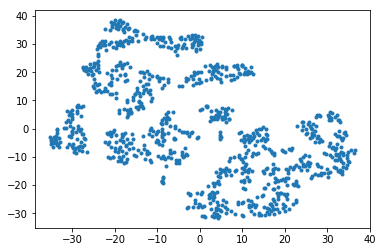

In [21]:
plt.plot(tsne.embedding_[:,0],tsne.embedding_[:,1],'.')

In [23]:
dff = pd.DataFrame(tsne.embedding_,index = df.index)

In [24]:
dff['labels'] = model.labels_

In [25]:
dff

,0,1,labels
Id,,,
1,9.980312,22.406172,2
2,-30.800158,-2.452636,2
3,33.413750,-4.182283,1
4,31.882887,3.990599,2
5,-18.647528,-10.703215,2
6,5.147901,21.770508,2
7,-24.924564,22.244028,2
8,-8.406225,3.911407,2
9,7.830131,18.847559,2


In [27]:
class1 = dff[dff['labels'] == 0]
class2 = dff[dff['labels'] == 1]
class3 = dff[dff['labels'] == 2]

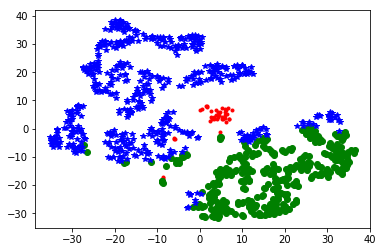

In [31]:
plt.plot(class1[0],class1[1],'r.')
plt.plot(class2[0],class2[1],'go')
plt.plot(class3[0],class3[1],'b*')
plt.show()

In [33]:
from sklearn.metrics import calinski_harabaz_score

In [35]:
calinski_harabaz_score(data,model.labels_)

384.9971429404898

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(data,model.labels_)

0.35405425892835685

In [39]:
from sklearn.cluster import AffinityPropagation

In [42]:
ap = AffinityPropagation()

In [43]:
ap.fit(data)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [44]:
ap.labels_

array([11, 25, 16, 22, 15, 46, 40, 31, 11, 16, 40,  6, 23, 26, 45,  0, 30,
       37, 40,  6, 44, 15, 23, 39, 46, 26, 32, 10, 31,  1, 41, 40, 44, 34,
        2, 17,  3, 32,  4, 39, 40,  0, 12, 40, 42, 25, 13, 37, 10,  0, 15,
        8,  8, 35, 11, 37, 33, 19, 25, 17, 25, 38, 41,  9, 23, 46,  9, 25,
        6, 15, 24,  5,  3, 13,  8,  3, 18, 42,  0, 45,  6, 39,  3, 11, 44,
       17, 28, 17,  3, 28,  7, 22, 35,  2,  9, 32, 17, 46, 23, 16, 40,  9,
       30, 24,  5, 12, 12, 28,  5, 12, 31,  0, 15, 12, 46, 14, 17, 39, 19,
       38, 17,  8, 17,  6, 11,  6, 40, 31,  6, 29, 15, 39,  3, 40, 13, 31,
       12, 13, 18, 39, 32, 25, 46, 38, 46, 40, 44, 37, 26, 15,  0, 34, 35,
       25, 39,  6, 32, 12,  8, 23,  9, 28,  6, 11, 40, 12, 40,  3, 28, 40,
       23, 10, 16, 23, 11, 45, 13, 31, 17, 12, 42, 12, 34,  6, 13, 17, 37,
       17, 16, 33, 46,  5, 19, 37, 33, 15, 25, 15,  3, 44, 40, 34, 31, 35,
        3, 45, 31,  6,  9, 37, 40, 44, 28, 16, 13, 46, 12, 37, 28, 31, 32,
       16, 25, 40, 13,  1

In [45]:
from sklearn.cluster import MeanShift

In [46]:
ms = MeanShift()

In [47]:
ms.fit(data)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [48]:
ms.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [49]:
from sklearn.cluster import DBSCAN

In [51]:
db = DBSCAN

In [52]:
db.fit(data)

TypeError: fit() missing 1 required positional argument: 'X'